# K Nearest Neighbors
Author: Tommy James

In [301]:
# fetch dataset
from ucimlrepo import fetch_ucirepo

# Import needed packages for classification
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Import packages for visualization of results
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.colors import ListedColormap

# Iport packages for evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [302]:
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets.values 

# Reshape the target variable y
y = np.ravel(y)
X = pd.DataFrame(X)

X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [303]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [304]:
X.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Training and Testing the models

In [305]:
# Change class values into 1s and 0s for binary classification
# Convert M = 1, B = 0
y_encoded = np.where(y == 'M', 1, 0)
y_encoded

# Split the dataset into training and testing sets
# 80% of data for training
# 20% of data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [306]:
# Train models with n_neighbors 1 to 15
# Find the maximum accuracy 
# Print accuracy, n_neighbors, and the confusion matrix

max_acc = 0
n = 0
conf_matrix = []
acc_list = pd.DataFrame(columns=['K', 'Accuracy'])

for i in range(1, 16):
    knnClassifier = KNeighborsClassifier(n_neighbors=i)

    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Train model and make predictions for the test set
    knnClassifier.fit(X_train_scaled, np.ravel(y_train))
    y_pred = knnClassifier.predict(scaler.transform(X_test))

    acc = metrics.accuracy_score(y_pred, y_test)
    acc_list.loc[len(acc_list.index)] = [i, acc]
    
    # check for the max accuracy and create a confusion matrix
    if acc > max_acc:
        max_acc = acc
        n = i
        cm = metrics.confusion_matrix(y_pred, y_test)

# Compute metrics
print(f'max accuracy: {max_acc}')
print(f'n_neighbors = {n}')
print()

max accuracy: 0.9649122807017544
n_neighbors = 9



In [307]:
acc_list['K'] = acc_list['K'].astype(int)
acc_list.head()

,K,Accuracy
0,1,0.938596
1,2,0.947368
2,3,0.947368
3,4,0.956140
4,5,0.947368


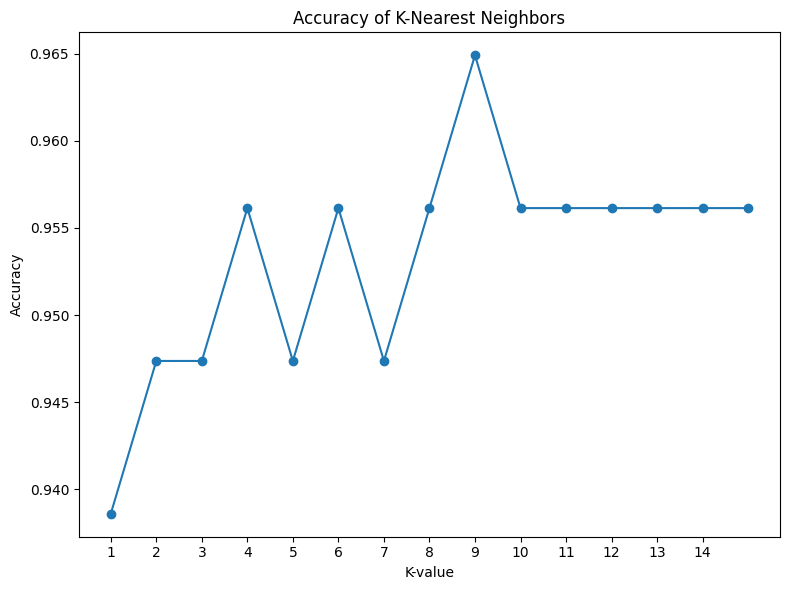

In [308]:
# Plot the accuracy for each k value
plt.figure(figsize=(8, 6))

sns.scatterplot(data=acc_list, x='K', y='Accuracy')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.title('Accuracy of K-Nearest Neighbors')
plt.xticks(range(1, 15))

# Connect a line to the data points
plt.plot(acc_list['K'], acc_list['Accuracy'], marker='o', linestyle='-')
plt.show()

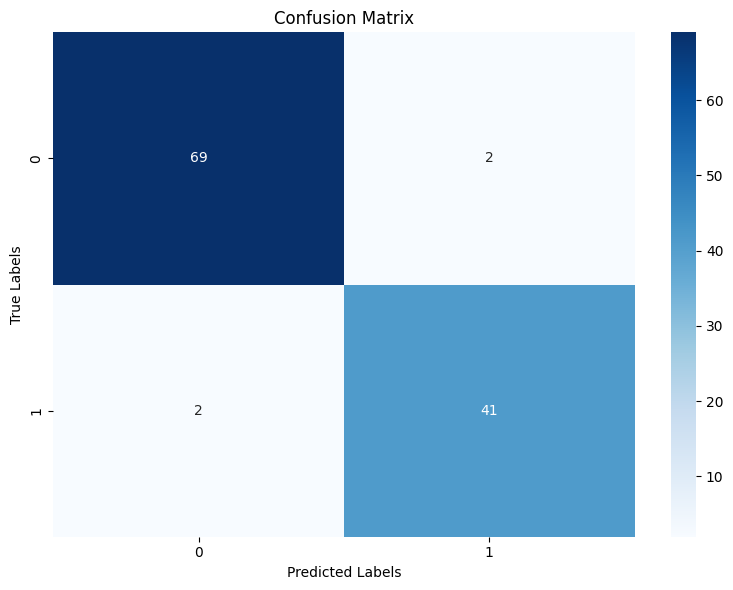

In [309]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Decision Boundaries

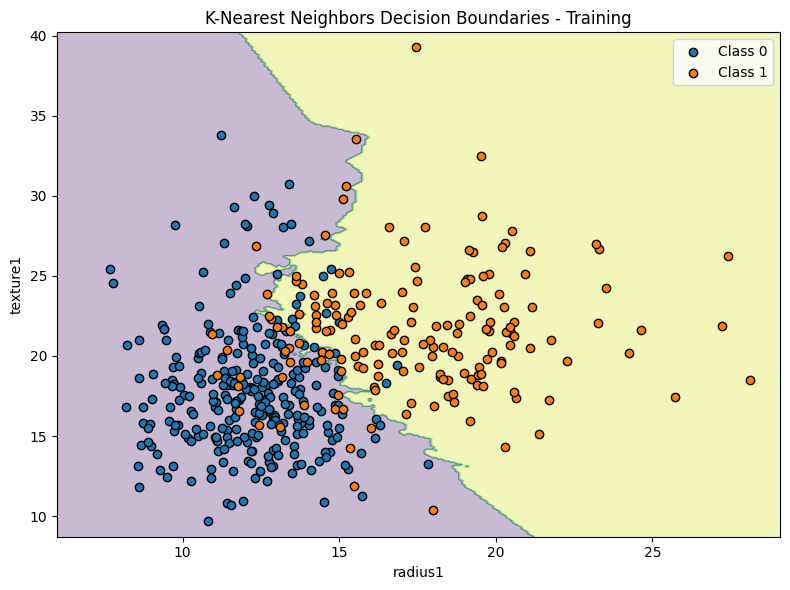

In [310]:
# Convert X dataframe to numpy array
X_arr = np.array(X)

# Use the first two columns of the feature matrix as features
selected_feature_indices = [0, 1]
X_selected = X_arr[:, selected_feature_indices]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)

# Create a KNN classifier with k=3 (you can change the value of k)
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train, y_train)

# Plot decision boundaries
plt.figure(figsize=(8, 6))

# Plot the decision boundary by assigning a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
h = 0.1  # step size in the mesh
x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

# # Plot the training points
# scatter_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolors='k', label='Training Data')
# # Plot the testing points
# scatter_test = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', edgecolors='k', label='Testing Data')

# Plot the training points for each class
for class_label in np.unique(y_train):
    class_indices = (y_train == class_label)
    plt.scatter(X_train[class_indices, 0], X_train[class_indices, 1], label=f'Class {class_label}', marker='o', edgecolors='k')

# Set labels and title
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('K-Nearest Neighbors Decision Boundaries - Training')

# Show legend
plt.legend()

# Show the plot
plt.show()


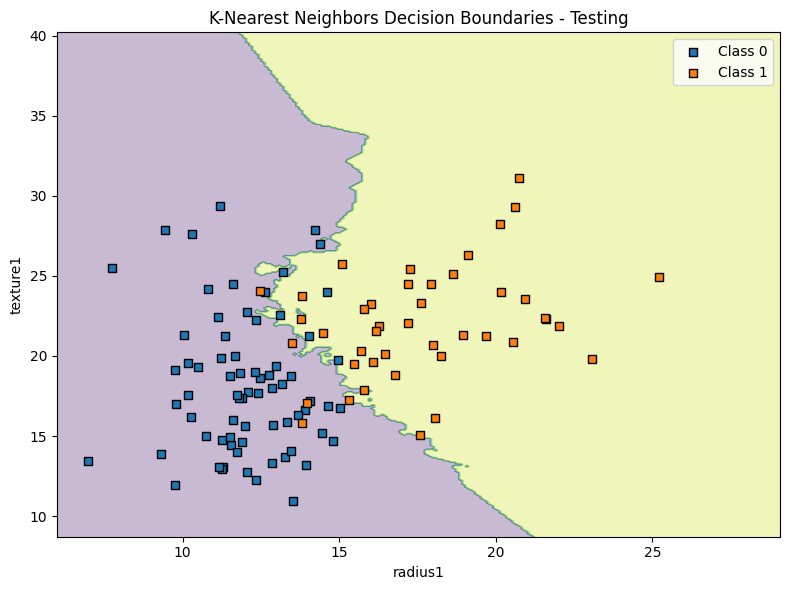

In [311]:
# Plot decision boundaries
plt.figure(figsize=(8, 6))

# Plot the decision boundary by assigning a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
h = 0.1  # step size in the mesh
x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

# # Plot the training points
# scatter_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolors='k', label='Training Data')
# # Plot the testing points
# scatter_test = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', edgecolors='k', label='Testing Data')

# Plot the testing points for each class
for class_label in np.unique(y_test):
    class_indices = (y_test == class_label)
    plt.scatter(X_test[class_indices, 0], X_test[class_indices, 1], label=f'Class {class_label}', marker='s', edgecolors='k')

# Set labels and title
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('K-Nearest Neighbors Decision Boundaries - Testing')

# Show legend
plt.legend()

# Show the plot
plt.show()